<a href="https://colab.research.google.com/github/Moorehe2/Assign2/blob/main/1Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One Way Anova

Import data from data.cdc.gov
Patinet from Outpatient and 

In [ ]:
import pandas as pd
import numpy as np
!

In [ ]:

Visit = pd.read_json('https://data.cdc.gov/resource/xt86-xqxz.json')

Visit.sample(200)





,indicator,panel,panel_num,unit,unit_num,stub_name,stub_name_num,stub_label,stub_label_num,year,year_num,age,age_num,estimate,flag,se
968,"Visits to physician offices, hospital outpatie...",Physician offices,2,Number of visits in thousands,1,Age,1,75 years and over,1.42,2000,1,75 years and over,1.42,97842.0,NaN,NaN
671,"Visits to physician offices, hospital outpatie...",All places,1,"Number of visits per 100 persons, crude",3,Race and age,5,White: 45-54 years,5.13,2015,16,45-54 years,1.31,NaN,...,NaN
241,"Visits to physician offices, hospital outpatie...",All places,1,"Number of visits per 100 persons, crude",3,Age,1,Under 18 years,1.10,2001,2,Under 18 years,1.10,305.0,NaN,NaN
861,"Visits to physician offices, hospital outpatie...",Physician offices,2,Number of visits in thousands,1,Age,1,18-44 years,1.20,2007,8,18-44 years,1.20,257257.0,NaN,NaN
580,"Visits to physician offices, hospital outpatie...",All places,1,"Number of visits per 100 persons, crude",3,Sex and age,3,Female: 75 years and over,3.22,2004,5,75 years and over,1.42,806.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,"Visits to physician offices, hospital outpatie...",All places,1,Number of visits in thousands,1,Age,1,18-44 years,1.20,2009,10,18-44 years,1.20,341209.0,NaN,NaN
285,"Visits to physician offices, hospital outpatie...",All places,1,"Number of visits per 100 persons, crude",3,Age,1,45-64 years,1.30,2013,14,45-64 years,1.30,NaN,...,NaN
507,"Visits to physician offices, hospital outpatie...",All places,1,"Number of visits per 100 persons, crude",3,Sex and age,3,Female: Under 18 years,3.17,2011,12,Under 18 years,1.10,341.0,NaN,NaN
533,"Visits to physician offices, hospital outpatie...",All places,1,"Number of visits per 100 persons, crude",3,Sex and age,3,Female: 45-54 years,3.19,2005,6,45-54 years,1.31,476.0,NaN,NaN


Define variables 

In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, bartlett




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Visit.stub_label.value_counts()

All persons                                     80
Under 18 years                                  51
55-64 years                                     51
45-64 years                                     51
18-44 years                                     51
75 years and over                               51
65 years and over                               51
45-54 years                                     51
65-74 years                                     51
Male                                            32
Female                                          32
Black or African American                       32
White                                           32
Black or African American: 65-74 years          16
Male: Under 18 years                            16
Female: 65-74 years                             16
Female: 55-64 years                             16
Female: Under 18 years                          16
White: 65-74 years                              16
Female: 75 years and over      

Independent Variables are Age1, Age2, Age3, Dependent varibable is Panel. What are the differences in Vistit to Medical Facilities?

In [ ]:
unit_num = Visit['unit_num']

In [ ]:
Age1 = Visit[Visit['stub_label'] == 'Under 18 years']
Age2 = Visit[Visit['stub_label'] == '55-64 years']
Age3 = Visit[Visit['stub_label'] == '65 years and over']






stats.f_oneway(Age1['unit_num'],
               Age2['unit_num'],
               Age3['unit_num'])










F_onewayResult(statistic=0.0, pvalue=1.0)

Post hoc test



In [ ]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=workingdf, res_var='unit_num', xfac_var='Stub_label', 
              anova_model='chol~C(cp)+C(thal)+C(cp):C(thal)')
res.tukey_summary


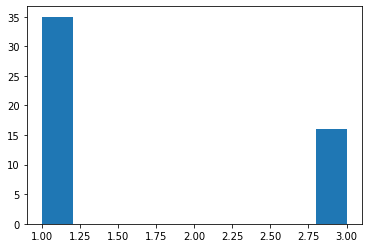

In [ ]:
plt.hist(Age1['unit_num'])
plt.show()



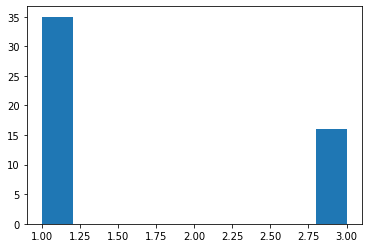

In [ ]:
plt.hist(Age2['unit_num'])
plt.show()

Unit 3

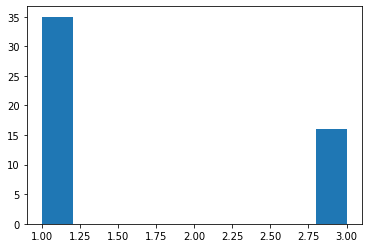

In [ ]:
plt.hist(Age3['unit_num'])
plt.show()

Post hoc test


In [49]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(Visit['stub_label_num'], Visit['unit_num'])
post_hoc_res = comp.tukeyhsd()
tukey1way = pd.DataFrame(post_hoc_res.summary())


Age1['unit_num'].describe()
Age2['unit_num'].describe()
Age3['unit_num'].describe()


count    51.000000
mean      1.627451
std       0.937247
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       3.000000
Name: unit_num, dtype: float64